In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the given Dataset

In [61]:
df=pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

# 1.Univariate Analysis


<AxesSubplot:xlabel='Sex', ylabel='Count'>

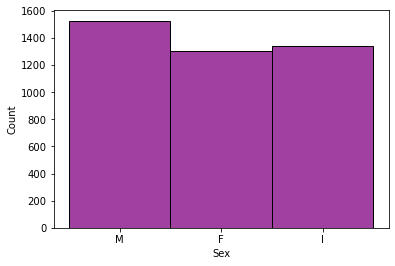

In [4]:
sns.histplot(df["Sex"],color='purple')

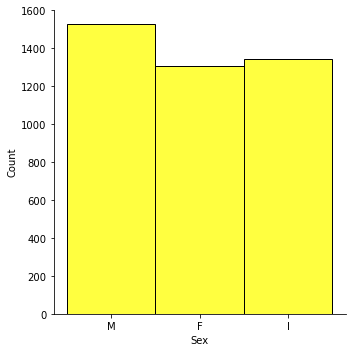

In [10]:
sns.displot(df["Sex"],color='yellow')


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

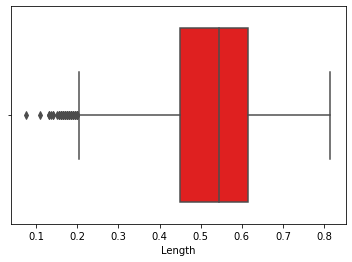

In [17]:
sns.boxplot(df["Length"],color='red')

# 2.Bivariate Analysis


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Length'>

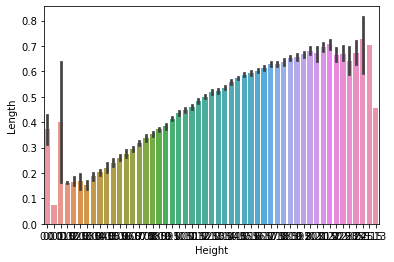

In [21]:
sns.barplot(df["Height"],df["Length"])


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Length'>

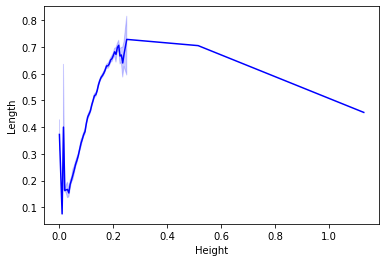

In [22]:
sns.lineplot(df["Height"],df["Length"], color='blue')


<AxesSubplot:xlabel='Height', ylabel='Length'>

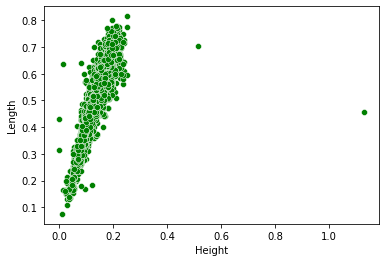

In [23]:
sns.scatterplot(x=df.Height,y=df.Length,color='green')


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Length'>

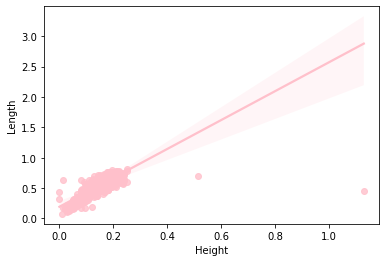

In [24]:
sns.regplot(df['Height'],df['Length'],color='pink')


# 3.Multivariate Analysis


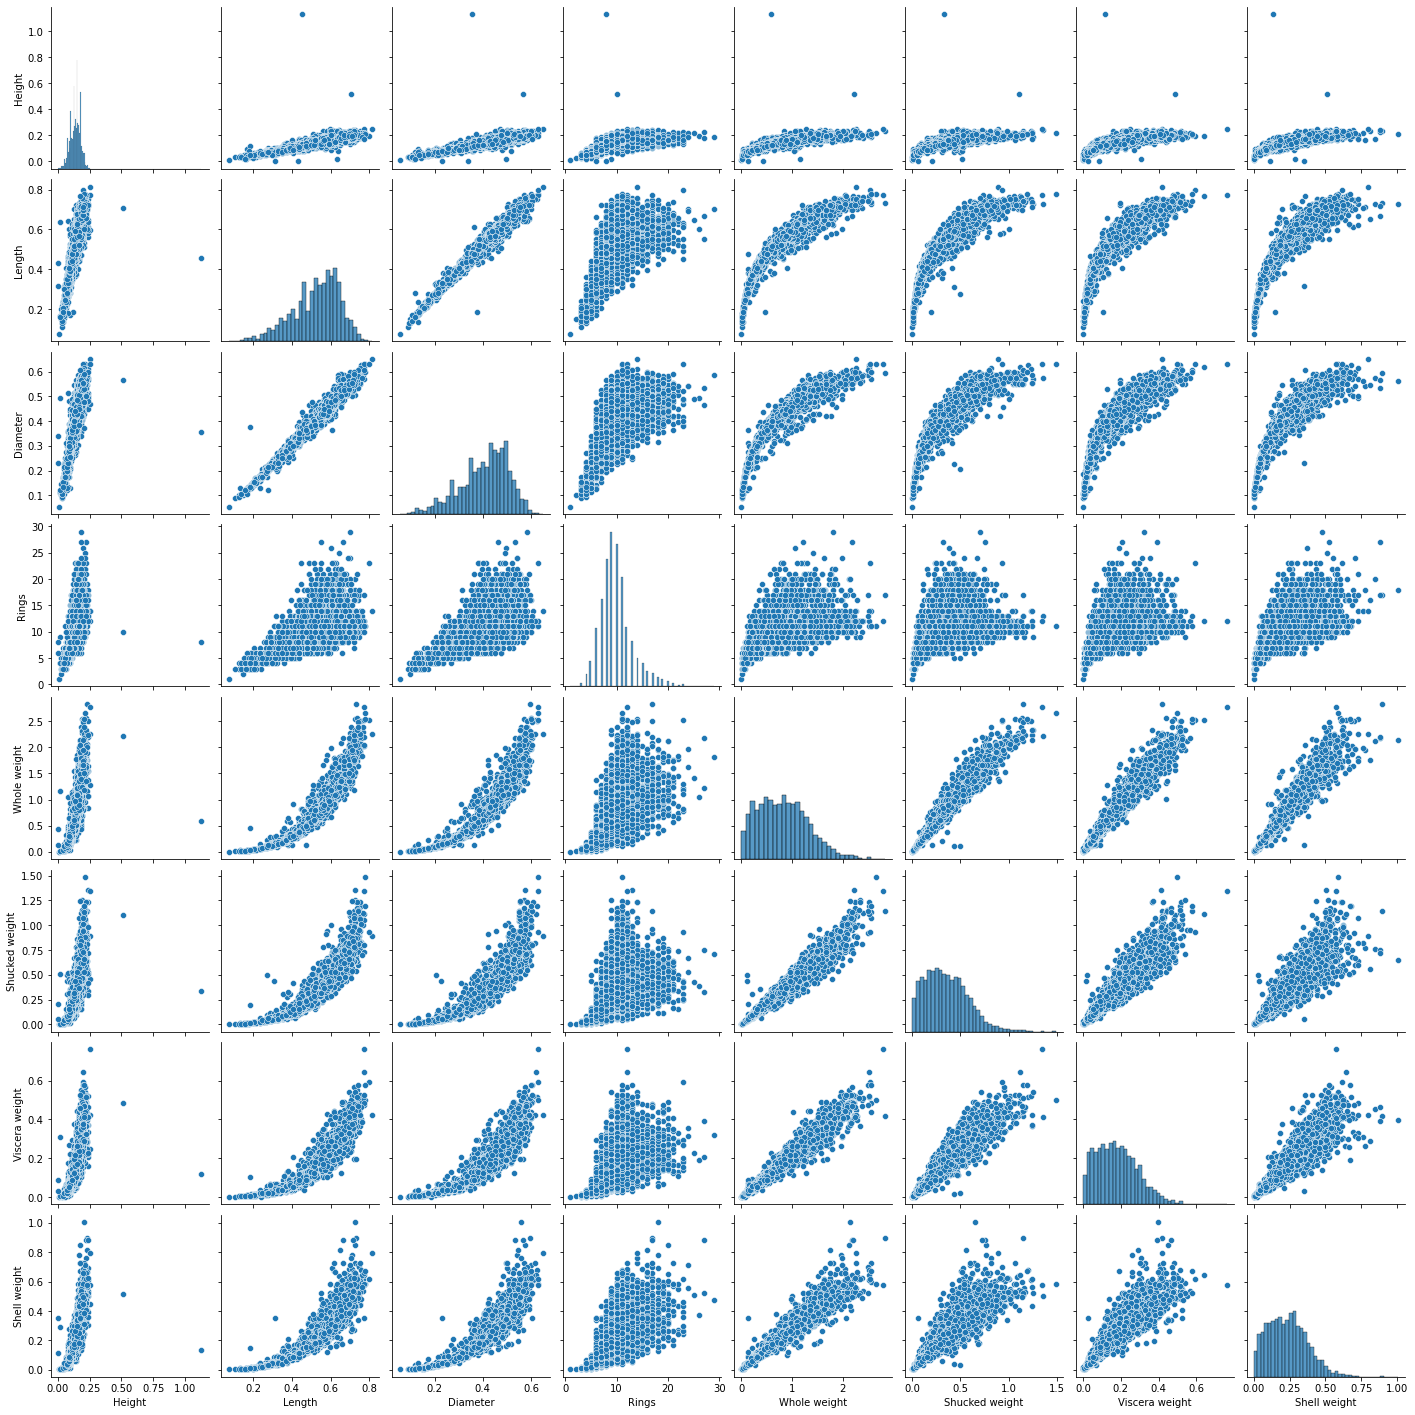

In [33]:
sns.pairplot(data=df[["Height","Length","Diameter","Rings","Whole weight","Shucked weight","Viscera weight","Shell weight"]])

# 4. Performing Descriptive Statisics


In [34]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# 5. Handling Missing Values

In [35]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# 6. Find the outliers and replace the outliers


In [36]:
outliers=df.quantile(q=(0.25,0.75))

In [37]:
outliers

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0


In [38]:
q1 = df.Rings.quantile(0.25)
q3 = df.Rings.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR

In [39]:
df.median(numeric_only=True)

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

<AxesSubplot:xlabel='Rings'>

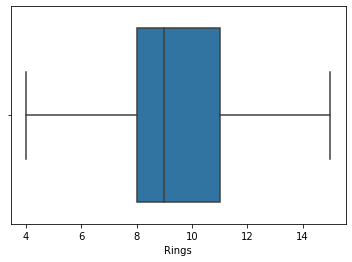

In [49]:
df['Rings'] = np.where(df['Rings'] < lower_limit, 7, df['Rings'])
sns.boxplot(x=df.Rings,showfliers = False)

# 7.Checking for Categorical columns and performing encoding.


In [57]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [64]:
df_numeric = df[["Height","Length","Diameter","Rings","Whole weight","Shucked weight","Viscera weight","Shell weight"]]
df_categorical = df[['Sex']]

In [65]:
df_numeric.head()

,Height,Length,Diameter,Rings,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.095,0.455,0.365,15,0.5140,0.2245,0.1010,0.150
1,0.090,0.350,0.265,7,0.2255,0.0995,0.0485,0.070
2,0.135,0.530,0.420,9,0.6770,0.2565,0.1415,0.210
3,0.125,0.440,0.365,10,0.5160,0.2155,0.1140,0.155
4,0.080,0.330,0.255,7,0.2050,0.0895,0.0395,0.055


In [66]:
df_categorical.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [67]:
print(df['Sex'].unique())

['M' 'F' 'I']


In [72]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

gender_encoder = OneHotEncoder()
gender_reshaped = np.array(df_categorical['Sex']).reshape(-1, 1)
gender_values = gender_encoder.fit_transform(gender_reshaped)
print(df_categorical['Sex'][:5])
print()
print(gender_values.toarray()[:5])
print()
print(gender_encoder.inverse_transform(gender_values)[:5])

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

[['M']
 ['M']
 ['F']
 ['M']
 ['I']]


In [73]:
Sex = pd.DataFrame(gender_values.toarray(), columns=['F', 'M', 'I'])

In [74]:
df_categorical_encoded = pd.concat([Sex], axis=1)

In [75]:
print(df_categorical_encoded.shape)
df_categorical_encoded.head()

(4177, 3)


,F,M,I
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [76]:
df_new = pd.concat([df_numeric, df_categorical_encoded], axis=1)
print(df_new.shape)
df_new.head()

(4177, 11)


,Height,Length,Diameter,Rings,Whole weight,Shucked weight,Viscera weight,Shell weight,F,M,I
0,0.095,0.455,0.365,15,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.090,0.350,0.265,7,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.135,0.530,0.420,9,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.125,0.440,0.365,10,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.080,0.330,0.255,7,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


# Split the data into dependent and independent variables.

In [81]:
y = df["Sex"]
y.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [83]:
x=df.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 9.Scaling the Independent Variables


In [84]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


# 10.Training and Testing Split


In [85]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [86]:
X_Train.shape

(3341, 8)

In [87]:
X_Test.shape

(836, 8)

In [88]:
Y_Train.shape

(3341,)

In [89]:
Y_Test.shape

(836,)

In [90]:
X_Train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.530402
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-2.150791
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.571544
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.020571
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.261349


In [91]:
X_Test.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
668,0.216591,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940,0.951154
1580,-0.199803,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685,-0.599818
3784,0.799543,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209,0.330765
463,-2.531611,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219,-1.530402
2615,1.007740,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287,0.640960


In [92]:
Y_Train.head()

3141    I
3521    I
883     M
3627    M
2106    M
Name: Sex, dtype: object

In [93]:
Y_Test.head()

668     M
1580    I
3784    M
463     I
2615    M
Name: Sex, dtype: object

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [95]:
model.fit(X_Train,Y_Train)

RandomForestClassifier()

In [96]:
Y_Predict=model.predict(X_Test)

In [97]:
Y_Predict_Train=model.predict(X_Train)

# Train the Model

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [99]:
print("Training Accuracy : ",accuracy_score(Y_Train,Y_Predict_Train))

Training Accuracy :  1.0


# Test the Model

In [100]:
print("Testing Accuracy : ",accuracy_score(Y_Test,Y_Predict))

Testing Accuracy :  0.5454545454545454


# Measure the performance using Metrics.

In [101]:
pd.crosstab(Y_Test,Y_Predict)

col_0,F,I,M
Sex,,,
F,93,28,128
I,29,224,38
M,104,53,139


In [102]:
print(classification_report(Y_Test,Y_Predict))

              precision    recall  f1-score   support

           F       0.41      0.37      0.39       249
           I       0.73      0.77      0.75       291
           M       0.46      0.47      0.46       296

    accuracy                           0.55       836
   macro avg       0.53      0.54      0.54       836
weighted avg       0.54      0.55      0.54       836

